# Numerical approaches for solving the time-independent Schrödinger equation in one dimension

The __time-independent Schrödinger equation (TISE)__ in one dimension is given by

$$\qquad\qquad\qquad\qquad\quad\;
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}+ V(x)\,\psi(x) = E\,\psi(x),
\qquad\qquad\qquad\qquad\;\textbf{(1)}$$

where $\psi(x)$ is the wavefunction (or state) of the quantum-mechanical system, $E$ is the energy of the system, and the potential function $V(x)$ depends up on the physical system being studied. "Solving" the Schrodinger equation amounts to finding the pairs of energies $E_n$ and wavefuntions $\psi_n(x)$ that satisfy __Eq. (1)__. 

Analytic solutions to the TISE can be obtained for a handful of functions for the potential $V(x)$, such as the infinite and finite square well, the harmonic oscillator, and the Dirac delta funtion.  These are discussed, _e.g._ in [Griffiths "Quantum Mechanics" Chapter 2](http://www.physicspages.com/Griffiths%20QM.html).  Most systems in the real world, however, have more complicated potential functions, such that the TISE must be solved numerically.  Fortunately, since the TISE is a second-order ordinary differential equation (ODE), there are many numerical tools available to solve it, at least one of which will work for most potential functions that you encounter.

Broadly, there are two categories of problems one can encounter with an ODE:

- <span STYLE="font-size: large; color:red">Initial-value problems (IVPs)</span>:  In this case, one knows the value of the solution at at an intial time, and wants to know the value of the solution at a later time.  We have already encountered IVPs in classical mechaics, where we used the equation(s) of motion to obtain the trajectory of a particle or system of particles at later times given initial values for the position(s) and velocity(ies).  We also already a know family of algorigthms for solving IVPs -- [Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge–Kutta_methods) -- of which the Euler and Euler-Richardson algorithms are the simplest implementations.


- <span STYLE="font-size: large; color:red">Boundary-value problems (BVPs)</span>: Here, one knows the value that the solution must take at certain locations (_i.e._ the boundaries), and wants to know the value of the solution at __all__ locations.  As you now know, finding the stationary-state solutions to the TISE falls into this category.  In this series of computational exercises, we will learn two numerical approachs for solving BVPs, and apply them to solve the TISE for the finite square well.  These methods can be employed, however, to find the bound-state solutions for any potential function $V(x)$. As we will see, the algorithms have different benefits that can make them more suitable for for certain potentials, or for answering certain questions (_e.g._ finding the lowest-energy level vs. finding all of the allowed energies). Further, the algorithms illustrate different properties of quantum-mechanical states and energies -- we will expand upon these points below.

## <span STYLE="color:blue">The Shooting Method$^1$</span>

The first method that we will implement is the ["shooting method"](https://en.wikipedia.org/wiki/Shooting_method).  This method reformulates a boundary-value problem as an intial-value problem, thereby allowing us to use the Runge-Kutte algorithms with which we are already familiar.  With the shooting method, one starts by satisfying the condition at one of the boundaries, and "shoots" out solutions until the other boundary condition(s) is met. 

In quantum-mechanics, we know that the allowed energies of a system are __quantized__.  Thus, to apply the shooting method to the TISE, we will start with a guess for the energy of the system, and use __Eq. (1)__ with this value othe energy $E$ to calculate the wavefunction $\psi(x)$ at all locations given the value for $\psi(x_0)$ at one of the boundaries. For all values of $E$, the resulting wavefuction $\psi(x)$ of course satistfies the TISE.  For most energy values, however, _the boundary conditions will not be satisfied_ and the resulting wavefunctions will not be normalizable and hence cannot represent a physical quantum-mechanical system. Hence, we will need to refine our guess for the value of $E$ until the resulting function $\psi(x)$ satisfies the boundary conditions.  In this way, we will find the allowed energies and wave functions.  

Now let's get into the details...

<span STYLE="color:blue">$^1$This exercise is adapted from Daniel Schroeder's ["Notes on Quantum Mechanics"](http://physics.weber.edu/schroeder/quantum/QuantumBook.pdf), section 2.2.</span>

### 1. Discretizing the Time-Independent Schrodinger Equation
In order to formulate the TISE on a computer, we must first __discretize__ it.  Discretization is the process of converting a continuous function into a set of discrete values, such that they can be stored and manipulated on a computer. 

As we know, a derivative is just the rate at which a function changes with respect to a given variable in the limit that the interval goes to zero:

$$ f'(a) = \lim_{h\to 0} \frac{f(a+h) - f(a)}{h} $$

To discretize a derivative, we simply make the interval ($h$ above) small, but finite. Once $h$ is finite, however, we have several choices for how to approximate $f'(a)$ such as the _forward difference_, _backward difference_, and _centered difference_, all of which are identical in the limit $h\to 0$.  Although the different discretizations for the derivative will yield different numerical results for $f'(a)$ when $h$ is finite, the results will become closer $h$ becomes smaller.  We refer to the error introduced because $h$ is finite as the __truncation error__.

Now let us discretize the TISE.  We start by isolating the second derivative of the wave function in Equation 1: 

$$\qquad\qquad\qquad\qquad\quad\;
\frac{d^2\psi}{dx^2}=-\frac{2m}{\hbar^2}\, (E-V(x))\, \psi(x),
\qquad\qquad\qquad\qquad\;\textbf{(2)}$$

We will employ a _"centered difference"_ or (_"symmetric difference"_) approximation for the second derivative, evaluating the first derivative a half step in either direction from x, where $dx$ is the step size:  

$$\qquad\qquad\qquad\quad
\frac{d^2\psi}{dx^2} \approx \frac{\frac{d\psi}{dx}\left(x+\frac{dx}{2}\right)-\frac{d\psi}{dx}\left(x-\frac{dx}{2}\right)}{dx}
\qquad\qquad\qquad\textbf{(3)}$$

We will then employ a _"forward difference"_ approximation for each of the first derivatives in the numerator: 

$$\qquad\qquad\qquad\quad\;\;\;
\frac{d\psi}{dx}\left(x+\frac{dx}{2}\right) \approx \frac{\psi(x+dx)-\psi(x)}{dx}
\qquad\qquad\qquad\quad\textbf{(4)}$$

$$\qquad\qquad\qquad\quad\;\;\;
\frac{d\psi}{dx}\left(x-\frac{dx}{2}\right) \approx \frac{\psi(x)-\psi(x-dx)}{dx}
\qquad\qquad\qquad\quad\textbf{(5)}$$

Using Eqs. (4) and (5) in Eq. (3), we obtain the following approximation for $\frac{d^2\psi}{dx^2}$: 

$$\qquad\qquad\qquad\quad\;
\frac{d^2\psi}{dx^2} \approx \frac{\psi(x+dx)+\psi(x-dx)-2\psi(x)}{(dx)^2}
\qquad\qquad\qquad\;\textbf{(6)}$$

Rearranging Eq. (6), we obtain the TISE in the form that we will use for the shooting method:

$$\qquad\quad\;\;
\psi(x+dx) \approx 2\psi(x)-\frac{2m(dx)^2}{\hbar^2}(E-V(x))\psi(x)-\psi(x-dx)
\qquad\;\;\;\textbf{(7)}$$

With this equation, given the value of the wave function $\psi$ at the neighboring points $x$ and $x-dx$, we can calculate the value of the wave function at the point to the right $x+dx$. Thus, in one dimension, _we can start with the values of the wave function at the left-hand boundary, and repeatedly apply Eq. (7) until we obtain the wave function at the right-hand boundary_. This simple algorithm is known as the __"shooting method"__.

### 2. The Finite Square Well and Natural Units

We will use the shooting method to find the stationary-state solutions for the finite square well potential.  The potential for a finite square well of width $a$ is can be written as:

$$ 
\qquad\qquad\qquad V(x)=\left\{\begin{array}{ll}
0 & \quad  \frac{-a}{2}\leq x \leq \frac{a}{2},\\
V_0 & \quad elsewhere. 
\end{array}
\right. \qquad\qquad\qquad\quad\textbf{(8)}
$$

where we have chosen to center the well at $x=0$ with a length of $a=1$. This will simplify the computer code.

The finite square well permits both bound-state ($E < V_0$) and scattering-state ($E > V_0$) solutions.  _Here we will focus on the bound-state solutions._  

We will use _natural units_ in our calculation, setting all of the quantities with dimensions ($a$, $m$, and $\hbar$) equal to 1.  With this choice, our units of energy are now $\frac{\hbar^2}{ma^2}$.  In other words, to convert the energies obtained in our simulation to SI units, we must multiply them by the quantity $\frac{\hbar^2}{ma^2}$.   The use of natural units will not only simplify our code, but it will also make our resuts more general.  This is because we choose _any_ values of of the particle mass $m$ and width of the well $a$ at a later date and re-interpret the results of our simulation using the appropriate conversion factor(s).   

We do, however, have to specify a value for $V_0$ before running our code. We will use the energy levels of the infinite square well, which is of course a limiting case of the finite square well, as a guide.  We would like to choose a value of $V_0$ that is large enough to allow several bound states, but not so large as to look too similar to the infinite-square-well case.  Recall that the energy levels of the infinite square well are given by 

$$\qquad\qquad\qquad\quad\;\;\;
E_n = \frac{n^2\pi^2\hbar^2}{2 m a^2}
\qquad\qquad\qquad\quad\textbf{(9)}$$

In our natural units, $E_n \approx 5n^2$, so the lowest values would be $E \approx 5, 20, 45, 80, \ldots$ We therefore expect values $V_0$ in this range to lead to interesting results, and will choose $V_0 = 50$ to begin with.

### 3. Implementing the Shooting Method

In the rest of the notebook, we will guide you through implementing the shooting method for the finite square well in Python.  In each step, we will specify what portion of the code belongs in the subsequent cell.

<span STYLE="font-size: large; color:red">(_But first, a bit about Python and Jupyter notebooks..._)</span>  

In Jupyter, there are two types of cells for __"markdown"__ (_i.e._ text) and __"code"__ (which is just what you think).  In the markdown cells, you can typeset equations in LaTeX by placing them between $ signs.  You can change the cell type using the option under the _"Cell"_ menu above.  Within the code cells, you can add comments by placing a # sign at the beginning of the line.  Almost every question that you will have about Python and Jupyter has been asked and answered already on the internet.  Thus, I encourage you to use [Google](www.google.com) as a resource when troubleshooting your code. 

First import the modules __pyplot__ and __pylab__ (_needed for plotting the wave functions_); __numpy__ (_for array manipulation_); and __scipy.integrate.simps__ (_to normalize the wave functions_).

In [1]:
import matplotlib.pyplot as plt  
from pylab import xlabel,ylabel
import numpy as np
from scipy.integrate import simps
from math import pi

First, define your constants. Start with the value of the potential outside the well, $V_0$ = 50.  

You will need to give an initial guess for E and an amount by which to vary the energy dE when searching for a solution that satifies the boundary conditions.  This will determine the precision with which you determine the allowed energies.  You can start with dE being fairly large while writing and debugging your code, but will eventually want to make it small enough that you obtain accurate anwers.  Note that, if you are looking for the lowest energy level a good value for starting your search is E=0. Otherwise _you could accidentally begin with a value that is already above the ground-state energy, and hence miss it alltogether when increasing E in steps of dE!_

Next, define your range of x values.  You need a range in x that not only covers the potential well, but wide enough that the wave function can be approximated to be zero at the boundaries, _e.g._ x $\in$ [-xMax,xMax] with xMax ~1.5.  You also need to identify a step size dx for use in the shooting algorithm [Eq. (7) above].  Again, for debugging this can be fairly coarse (say, 0.01), but you will want to make it smaller to obtain your final results. It will be useful to store all of your x values together, _e.g._, in a Python list xList. You can create xList using the [numpy arange function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).

Last, introduce a constant tol that will dictate how close the value of $\psi$ must be at the right-hand boundary (xMax). Again, the tolerance can be fairly loose to begin with, but made tighter once your code is working.

<span STYLE="font-size: large; color:red">_Tip:_</span> if you make V0, xMax, dx, and tol global variables, you can use them inside your functions without passing them as arguments.  Don't, however, the other quantities global since you will be updating the values of E and dE as you hone in on a solution that satisfies the boundary conditions on both the left- and the right-hand sides.  

In [2]:
global Eguess, xMax, dx, tol, V0, a, m, h
V0 = 50.
Eguess = 0.
dE = 0.1
xMax = 2.
xMin = -xMax
dx = 0.001
tol = 0.01
a = 1
m = 1
h = 1

xlist = np.arange(-xMax,xMax+dx,dx)



Next, write a function V(x) that gives the value of the potential V(x).

In [3]:
# potential function V(x) goes here

def Vx(x):
    v = 0
    if x <= -(a/2):
        v = V0
    if x >= (a/2):
        v = V0
    return v


Next write a function that implements the shooting method for a given value of the energy E. I suggest creating a list psiList to hold the values of the position and of the wave function, and appending to it every time you apply Eq. (7) to get the Psi at the next point to the right.  

Within your function, you should initialize psiList with zero at right-hand boundary -xMax, and something very small (_but not zero!_) at -xMax + dx.  In other words, 

    psiList = [0.0, 0.001*dx]  

Your function should return the completed psiList, which will now contain the values of the wave function at each of the points in xList for the trial energy E.  

<span STYLE="font-size: large; color:red">_Stop and check_: </span>Both xList and psiList should have the same length, which should be equal to (2*xMax/dx + 1).  _Do they_?

In [4]:
# this function implements one iteration of the shooting method for an energy value E
def shot(Eguess, xlist):
    
    psilist = [0.0, 0.001*dx]
    for x in xlist[1:-1]:
        newpsi = 2*psilist[-1]*(1-(dx**2)*(Eguess-Vx(x))) - psilist[-2]
        
        psilist.append(newpsi)
        
    return psilist

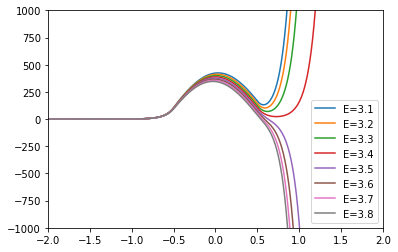

In [5]:
# print the final ground-state energy and plot the corresponding wave function
for Eguess in np.arange(3.1,3.9,0.1):
    
    psi = shot(Eguess,xlist)
    plt.plot(xlist,psi,label="E="+str(round(Eguess,2)))

plt.axis([-xMax,xMax,-1000,1000])
plt.legend()
plt.show()


Now it's time to start searching for the ground-state energy.  As described above, we can make an initial guess for the energy E and then use Eq. (7) -- which is just a discretized form of the TISE -- to "shoot" $\psi$ from the left boundary to the right boundary.  We can then check to see if $\psi = 0$ (within the specified tolerance) at the right boundary.

Of course, if our guess for E is not correct (which it most likely won't be), we must try again.  Rather than guessing a new E at random, we will narrow in on the correct value of E in a systematic way.

Below are the basic steps of our algorithm:

1. Use your "shot" function to calculate psi for a given value of E. 


2. Check to see if psi[xMax] is within your stated tolerance of zero.

    * If yes, then you are done.  Proceed to step ...
    
    * If no, then increment the energy to E + dE and try again.
    
    
3. If dE is too coarse, at some point you will likely "overshoot" the correct value.  You can identify that you missed the allowed energy if the value of psi[xMax] changes sign (_i.e_ from positive to negative, or from negative to positive). Thus you should keep a running tab of the value of psi[xMax] from the last run, to check for this occurence.  
    
    * If psi[xMax] changes sign, then you need to go the other direction in energy, and also use a smaller step size.  You can do this by simply setting dE = -dE/10 (_or some other number greater than 1_) and continuing the iteration process.  This algorithm is known as the [bisection method](https://en.wikipedia.org/wiki/Bisection_method).


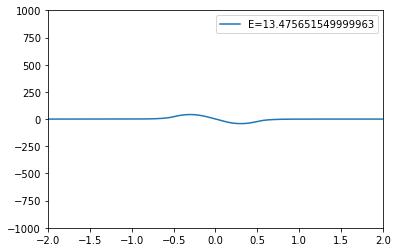

In [6]:
# the basic shooting algorithm using the bisection method to narrow in on the correct energy 

Psi = shot(Eguess, xlist)
psiend = Psi[-1]
signshot = int(psiend/abs(psiend))

# check if boundary condition on right is satisfied
while abs(Psi[-1]) > tol:
    
    Eguess = Eguess + dE 
    Psi = shot(Eguess, xlist)
    lastsignshot = signshot 
    psiend = Psi[-1]
    signshot = int(psiend/abs(psiend))
    
    # check if sign of wave function at xMax changed sign
    if (signshot != lastsignshot):
        dE = -dE/10
        
# plot wave function        
plt.plot(xlist,Psi,label="E="+str(Eguess))
plt.axis([-xMax,xMax, -1000,1000])
plt.legend()
plt.show()

    
        
    


Last, print your result for E, and plot the wave function $\psi$ versus $x$.  Examples of simple plots using matplotlib.pyplot can be found in the [Matplotlib online documentation](https://matplotlib.org/tutorials/introductory/sample_plots.html).

### 4. Follow-ups

Explore the simulation:

* Vary the step size dx and see what happens.

* Vary the $x$ range xMax and see what happens.

* Vary the tolerance tol and see what happens.

* Vary the potential height $V_0$ and see what happens.

Homework:

1. __For $V_0$ = 50, calculate all energy levels below $V_0$ and plot the normalized wave functions__. _Note that the wave functions for the higher energy levels are wider and thus spill out of the well more.  You will have to increase the x range of the simulation as $V_0$ increases to ensure that the entire wave function fits within [-xMax,xMax]._ 

    * __Quantitatively compare the allowed energies and qualitatively compare the corresponding wave functions to those of the infinite square well.__


2. The number of bound-state solutions depends upon the height of the well $V_0$. __How many bound states does the finite square well have when $V_0$ = 40, 30, 20, and 10 (in natural units)?__  

    * Griffiths (3rd Ed.) solves the finite square well analytically in Section 2.6 of his ["Introduction to Quantum Mechanics"](https://www.cambridge.org/core/books/introduction-to-quantum-mechanics/990799CA07A83FC5312402AF6860311E), up to a transcendental equation that must be solved numerically.  __Make a graph like Fig. 2.17 drawing curves for $\sqrt{(z_0/z)^2 - 1}$ corresponding to each of these $V_0$ values.  Does the number of bound states that you find with this graphical method agree with your numerical calculation above?  _Explain_.__


3.  The graphical method for solving the transcendental equation shows that, when $V_0$ is sufficiently small (corresponding to a "shallow, narrow well"), there is only a single bound-state solution.  __Use your shooting-method code to identify how small $V_0$ must be (_to the nearest integer_) for this to occur. Are this value of $V_0$ and the corresponding energy consistent with the analytic solution?  _Explain_.__ 


<span STYLE="font-size: large; color:red">_Have fun!_</span> 